<a href="https://colab.research.google.com/github/VyomaD/kdm_tech/blob/main/ICP_lab1/source/ICP_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk.corpus import stopwords
!pip install geotext
from geotext import GeoText
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
     |████████████████████████████████| 2.0MB 4.9MB/s 


In [ ]:
# Mounting google drive

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing data and performing sent,word tokenization

wwdatapath = pd.read_csv("/content/drive/MyDrive/data/worldwar1_data.txt",delimiter="\t")
worldwar_text = wwdatapath.to_string()
tokenized_text = sent_tokenize(worldwar_text)
tokenized_word = word_tokenize(worldwar_text)
tokenized_word

In [ ]:
# ANALYSIS 1: Identifying places in the text

places = GeoText(worldwar_text) # Extracting places using geotext library
unique_countries = list(set(places.countries)) # finding unique countries
unique_cities = list(set(places.cities)) # finding unique cities
print('All unique countries: ', unique_countries)
print('All unique cities: ', unique_cities)


All unique countries:  ['Bulgaria', 'Mexico', 'Italy', 'Romania', 'Japan', 'United States', 'Greece', 'Germany', 'Russia', 'China', 'Belgium', 'France', 'Serbia']
All unique cities:  ['Versailles', 'Belgrade', 'Sarajevo', 'London', 'March', 'Alliance']


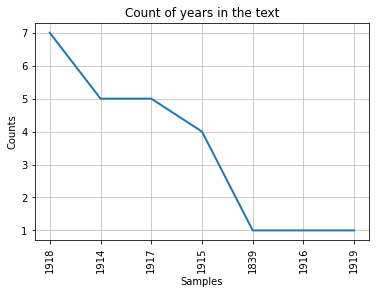

In [ ]:
# ANALYSIS 2: Extracting time range for WW1

years = re.findall(r'\d\d\d\d', worldwar_text) # finding all 4 digit years
fdist = FreqDist(years) # plotting freq distribution of occurence of years
fdist.plot(7,cumulative=False, title='Count of years in the text')
plt.show()

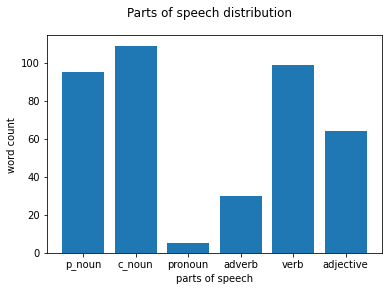

In [ ]:
# ANALYSIS 3: Distribution of Parts-of-speech

# finding all pos from the text using nltk
pos_tags = nltk.pos_tag(tokenized_word) 

# Extracting proper noun,common noun, pronuon, adverb, verb and adjective
prop_nn, comm_nn, pr_nn, advrb, vrb, adj = [], [], [], [], [], []
for tag in pos_tags:
    wrd, tg = tag

    # iterating over the word to find any punctuation and skipping those words
    if any([(True if alpt in string.punctuation else False) for alpt in wrd]):
        continue
    
    # classifying different parts of speech
    if 'NNP' in tg:
        prop_nn.append(wrd)
    elif ('NNP' not in tg) and ('NN' in tg):
        comm_nn.append(wrd)
    elif 'PR' in tg:
        pr_nn.append(wrd)
    elif 'RB' in tg:
        advrb.append(wrd)
    elif 'VB' in tg:
        vrb.append(wrd)
    elif 'JJ' in tg:
        adj.append(wrd)

# Extracting unique words for each POS
prop_nn = list(set(prop_nn))
comm_nn = list(set(comm_nn))
pr_nn = list(set(pr_nn))
advrb = list(set(advrb))
vrb = list(set(vrb))
adj = list(set(adj))

# plotting the POS distribution
plt.bar(['p_noun', 'c_noun', 'pronoun', 'adverb', 'verb',
          'adjective'], [len(prop_nn), len(comm_nn), len(pr_nn), len(advrb),
          len(vrb), len(adj)])
plt.xlabel('parts of speech')
plt.ylabel('word count')
plt.suptitle('Parts of speech distribution')
plt.show()
